# IA353 - Redes Neurais
# EFC3 - Questão 7

# Interpretability
dataset: MNIST

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**  Rafael Ito

# 7.1 Libraries and packages

## 7.1.1 Install packages

In [ ]:
# install Python libs
!pip install -q         \
    numpy               \
    innvestigate        \
    keras==2.2.4        \
    tensorflow==1.15.0   \
    git+https://github.com/raghakot/keras-vis.git -U
    #keras-vis

## 7.1.2 Import libraries

In [ ]:
#-------------------------------------------------
# general
import numpy as np
import sys
import os
import pdb
import subprocess
from collections import Counter
from multiprocessing import cpu_count
#-------------------------------------------------
# interpretability
import keras
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import innvestigate
import matplotlib.pyplot as plt
from vis.visualization import visualize_activation
from vis.utils import utils
#-------------------------------------------------
# random seed generator
os.environ['PYTHONHASHSEED']=str(42)
np.random.seed(42)
#tf.random.set_seed(42)
tf.random.set_random_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

## 7.1.3 Device info

In [ ]:
# choose between CPU and GPU
device = tf.device('/cpu:0')
#if tf.config.list_physical_devices('GPU'):
if tf.config.experimental.list_physical_devices('GPU'):
    device = tf.device('/device:GPU:0')
#    device_model = torch.cuda.get_device_name(0)
#    device_memory = torch.cuda.get_device_properties(device).total_memory / 1e9
    device_number = len(tf.config.experimental.list_physical_devices('GPU'))
    #----------------------------
    #from tensorflow.python.client import device_lib
    #print(device_lib.list_local_devices())
    #----------------------------
    print('Device: gpu')
    #print('GPU model:', device_model)
    #print('GPU memory: {0:.2f} GB'.format(device_memory))
    print("GPUs available: ", device_number)
    print('#-------------------')
print('CPU cores:', cpu_count())

Device: gpu
GPUs available:  1
#-------------------
CPU cores: 2


# 7.2 Training

In [ ]:
#Questao 7:
#----------
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.get_config()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
evaluation = model.evaluate(x_test, y_test)

model.save('mnist_model.h5')

Epoch 1/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.1859 - acc: 0.9431
Epoch 2/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0807 - acc: 0.9762
Epoch 3/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0589 - acc: 0.9821
Epoch 4/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0497 - acc: 0.9844
Epoch 5/5
10000/10000 [==============================] - 1s 57us/step


# 7.3 iNNvestigate (item 7a)

In [ ]:
# counting samples per class
unique, counts = np.unique(y_test, return_counts=True)
# cumulative sum
sum_count = np.cumsum(counts)
#----------------------------
print(counts)
print(sum_count)

[ 980 1135 1032 1010  982  892  958 1028  974 1009]
[  980  2115  3147  4157  5139  6031  6989  8017  8991 10000]


In [ ]:
# sort X and y test set
sort = y_test.argsort()
x_test_sort = x_test[sort[::1]]
y_test_sort = y_test[sort[::1]]

In [ ]:
# function that randomly sample two different images from the same class
def get_index(digit_class, counter):
    if (digit_class == 0):
        rand1 = np.random.randint(low=0, high=counter[digit_class%10])
        rand2 = np.random.randint(low=0, high=counter[digit_class%10])
        while (rand2 == rand1):
            rand2 = np.random.randint(low=counter[(digit_class-1)%10], high=counter[digit_class%10])
    else:
        rand1 = np.random.randint(low=counter[(digit_class-1)%10], high=counter[digit_class%10])
        rand2 = np.random.randint(low=counter[(digit_class-1)%10], high=counter[digit_class%10])
        while (rand2 == rand1):
            rand2 = np.random.randint(low=counter[(digit_class-1)%10], high=counter[digit_class%10])
    return rand1, rand2

In [ ]:
sample = np.zeros(shape=(6,28,28))
#----------------------------
# digit 3
rand1, rand2 = get_index(3, sum_count)
sample3_1 = x_test_sort[rand1]
sample3_2 = x_test_sort[rand2]
np.append(sample, (sample3_1, sample3_2))

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# getting samples
sample = np.empty(shape=(6,28,28))
#----------------------------
# digit 3
rand1, rand2 = get_index(3, sum_count)
sample[0] = np.squeeze(x_test_sort[rand1])
sample[1] = np.squeeze(x_test_sort[rand2])
#----------------------------
# digit 4
rand1, rand2 = get_index(4, sum_count)
sample[2] = np.squeeze(x_test_sort[rand1])
sample[3] = np.squeeze(x_test_sort[rand2])
#----------------------------
# digit 7
rand1, rand2 = get_index(7, sum_count)
sample[4] = np.squeeze(x_test_sort[rand1])
sample[5] = np.squeeze(x_test_sort[rand2])
#----------------------------
sample.shape

(6, 28, 28)

In [ ]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

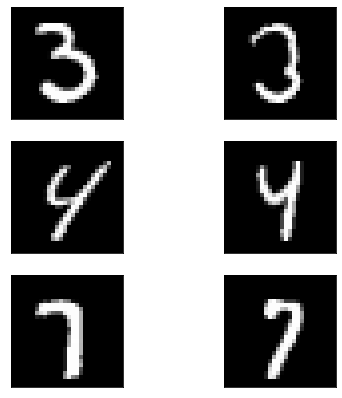

In [ ]:
# Visualization of the sampled images
fig = plt.figure(figsize=(7,7))
ind = 1
for i in range(1, 4, 1):
    for j in range(1, 3, 1):
        fig.add_subplot(3,2,ind)
        show(np.squeeze(sample[ind-1]))
        plt.xticks([])
        plt.yticks([])
        ind+=1

In [ ]:
#Questao 7a:
#-----------
#mnist = keras.datasets.mnist
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.load_model('mnist_model.h5')
model_wo_sm = innvestigate.utils.keras.graph.model_wo_softmax(model)

#imagem = x_test[0:1]
#plot.imshow(imagem.squeeze(), cmap='gray', interpolation='nearest')

#analyzer = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
#analysis = analyzer.analyze(imagem)
#plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

Importing classes and instantiating them

In [ ]:
from innvestigate.analyzer.gradient_based import Gradient, SmoothGrad
from innvestigate.analyzer.deeptaylor import DeepTaylor
from innvestigate.analyzer.relevance_based.relevance_analyzer import LRPAlphaBeta, LRPEpsilon, BaselineLRPZ
#----------------------------
gradient    = Gradient(model=model_wo_sm)
smoothgrad  = SmoothGrad(model=model_wo_sm)
deeptaylor  = DeepTaylor(model=model_wo_sm)
lrpa        = LRPAlphaBeta(model=model_wo_sm, alpha=1, beta=0)
lrpe        = LRPEpsilon(model=model_wo_sm, epsilon=1)
lrpz        = BaselineLRPZ(model=model_wo_sm)

Function that plots analyzer outputs

In [ ]:
def plot_analyzer(raw, analyzed):
    # Visualization of tha sampled images
    fig = plt.figure(figsize=(10,10))
    ind = 1
    for i in range(1, 7):
        for j in range(1, 3):
            if j==1:
                fig.add_subplot(6,2,(i-1)*2+j)
                plt.imshow(np.squeeze(raw[ind-1]), cmap = "gray", interpolation = "none")
            if j==2:
                fig.add_subplot(6,2,(i-1)*2+j)
                plt.imshow(np.squeeze(analyzed[ind-1]), cmap='seismic', interpolation='nearest')
            plt.xticks([])
            plt.yticks([])
        ind+=1

## 7.3.1 Gradient

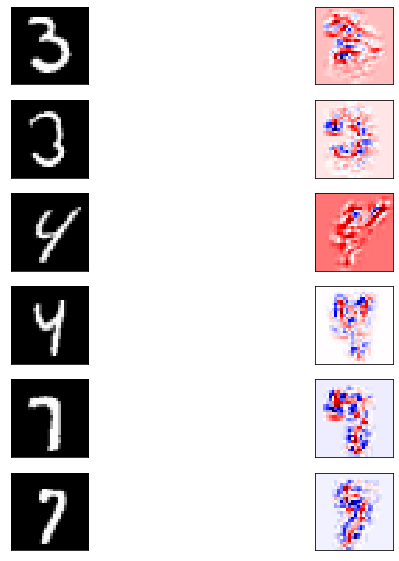

In [ ]:
analysis_gradient = np.zeros((6,28,28,1))
for i, tensor in enumerate(sample):
    analysis_gradient[i] = gradient.analyze(np.expand_dims(tensor, (0,-1)))
plot_analyzer(sample, analysis_gradient)

## 7.3.2 SmoothGrad

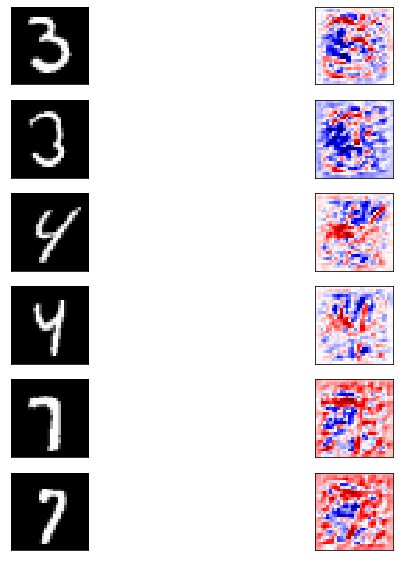

In [ ]:
analysis_smoothgrad = np.zeros((6,28,28,1))
for i, tensor in enumerate(sample):
    analysis_smoothgrad[i] = smoothgrad.analyze(np.expand_dims(tensor, (0,-1)))
plot_analyzer(sample, analysis_smoothgrad)

## 7.3.3 DeepTaylor

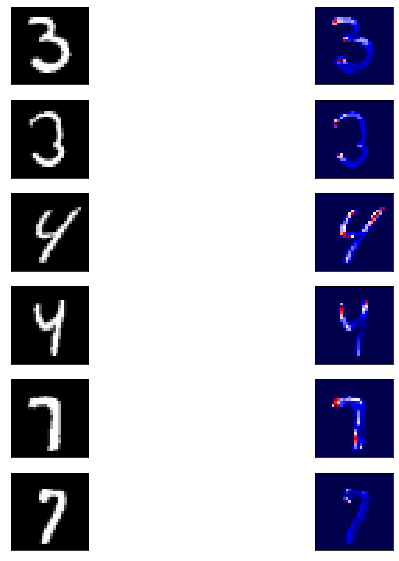

In [ ]:
analysis_deeptaylor = np.zeros((6,28,28,1))
for i, tensor in enumerate(sample):
    analysis_deeptaylor[i] = deeptaylor.analyze(np.expand_dims(tensor, (0,-1)))
plot_analyzer(sample, analysis_deeptaylor)

## 7.3.4 LRPAlphaBeta

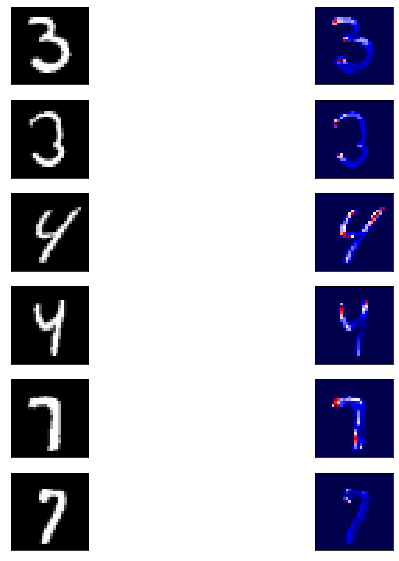

In [ ]:
analysis_lrpa = np.zeros((6,28,28,1))
for i, tensor in enumerate(sample):
    analysis_lrpa[i] = lrpa.analyze(np.expand_dims(tensor, (0,-1)))
plot_analyzer(sample, analysis_lrpa)

## 7.3.5 LRPEpsilon

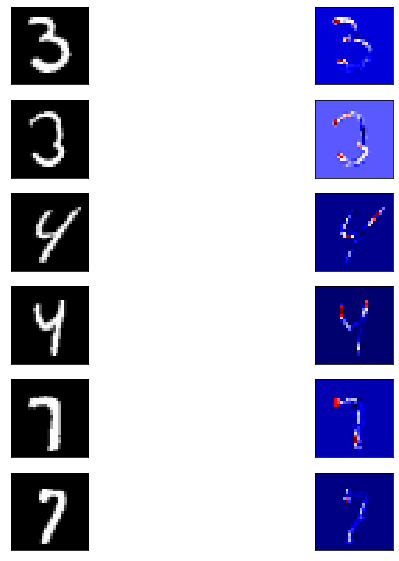

In [ ]:
analysis_lrpe = np.zeros((6,28,28,1))
for i, tensor in enumerate(sample):
    analysis_lrpe[i] = lrpe.analyze(np.expand_dims(tensor, (0,-1)))
plot_analyzer(sample, analysis_lrpe)

## 7.3.6 LRPZ

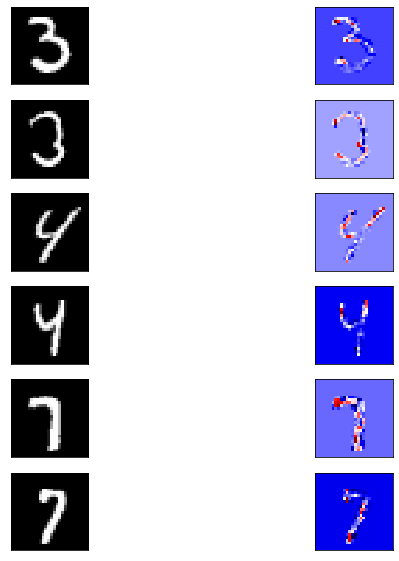

In [ ]:
analysis_lrpz = np.zeros((6,28,28,1))
for i, tensor in enumerate(sample):
    analysis_lrpz[i] = lrpz.analyze(np.expand_dims(tensor, (0,-1)))
plot_analyzer(sample, analysis_lrpz)

## 7.3.7 Summary

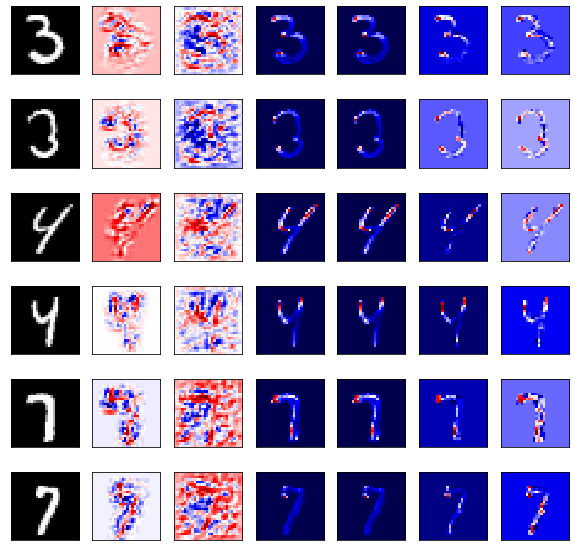

In [ ]:
# Visualization of tha sampled images
fig = plt.figure(figsize=(10,10))
ind = 1
for i in range(1, 7):
    for j in range(1, 8):
        if j==1:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(sample[ind-1]), cmap = "gray", interpolation = "none")
        if j==2:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(analysis_gradient[ind-1]), cmap='seismic', interpolation='nearest')
        if j==3:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(analysis_smoothgrad[ind-1]), cmap='seismic', interpolation='nearest')
        if j==4:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(analysis_deeptaylor[ind-1]), cmap='seismic', interpolation='nearest')
        if j==5:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(analysis_lrpa[ind-1]), cmap='seismic', interpolation='nearest')
        if j==6:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(analysis_lrpe[ind-1]), cmap='seismic', interpolation='nearest')
        if j==7:
            fig.add_subplot(6,7,(i-1)*7+j)
            plt.imshow(np.squeeze(analysis_lrpz[ind-1]), cmap='seismic', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
    ind+=1

# 7.4 Keras-vis (item 7b)

In [ ]:
#Questao 7b:
#-----------
model = keras.models.load_model('mnist_model.h5')
# change last layer (softmax) with a linear layer
#layer_idx = utils.find_layer_idx(model, 'dense_2')
layer_idx = -1
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)

## 7.4.1 Visualizing input that maximizes the output of class 0
(total variation = L-p norm = 0)

Iteration: 1, named_losses: [('ActivationMax Loss', -0.029343983), ('TV(2.0) Loss', 0.09444798)], overall loss: 0.06510399281978607
Iteration: 2, named_losses: [('ActivationMax Loss', 27.618795), ('TV(2.0) Loss', 551.72473)], overall loss: 579.343505859375
Iteration: 3, named_losses: [('ActivationMax Loss', -53.254124), ('TV(2.0) Loss', 214.1011)], overall loss: 160.84698486328125
Iteration: 4, named_losses: [('ActivationMax Loss', -162.3963), ('TV(2.0) Loss', 178.28627)], overall loss: 15.889968872070312
Iteration: 5, named_losses: [('ActivationMax Loss', -329.24582), ('TV(2.0) Loss', 190.78125)], overall loss: -138.46456909179688
Iteration: 6, named_losses: [('ActivationMax Loss', -446.4407), ('TV(2.0) Loss', 236.95157)], overall loss: -209.4891357421875
Iteration: 7, named_losses: [('ActivationMax Loss', -553.3071), ('TV(2.0) Loss', 259.10437)], overall loss: -294.2027587890625
Iteration: 8, named_losses: [('ActivationMax Loss', -643.4229), ('TV(2.0) Loss', 297.29596)], overall loss

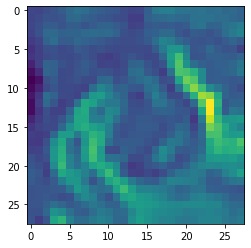

In [ ]:
filter_idx = 0
img = visualize_activation(model, layer_idx,
    filter_indices=filter_idx, input_range=(0., 1.), verbose=True,
    max_iter=1000, tv_weight=10., lp_norm_weight=0.)
#plot.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
plot.imshow(img.squeeze(), interpolation='nearest')

## 7.4.2 Tunning total variation parameter

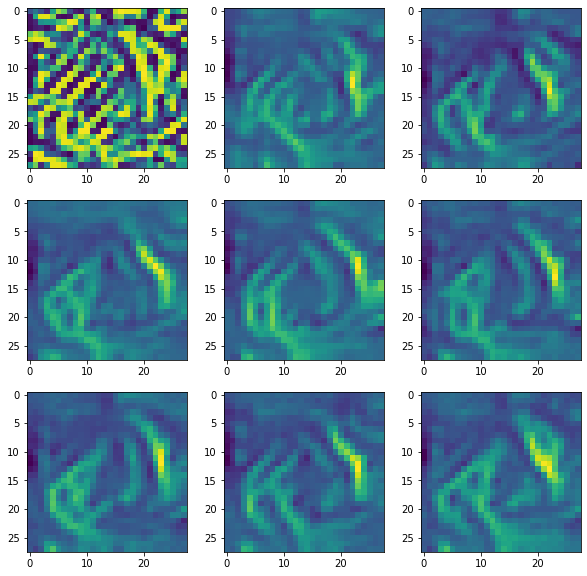

In [ ]:
filter_idx = 0
fig = plt.figure(figsize=(10,10))
for i, tv_weight in enumerate([0, 2, 4, 6, 8, 10, 12, 14, 16]):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                               tv_weight=tv_weight, lp_norm_weight=10.)
    #plt.figure()
    fig.add_subplot(3,3,i+1)
    plt.imshow(img[..., 0])

Total variation = 8 seems to be a good value (default=10)

## 7.4.3 Tunning L-p norm parameter

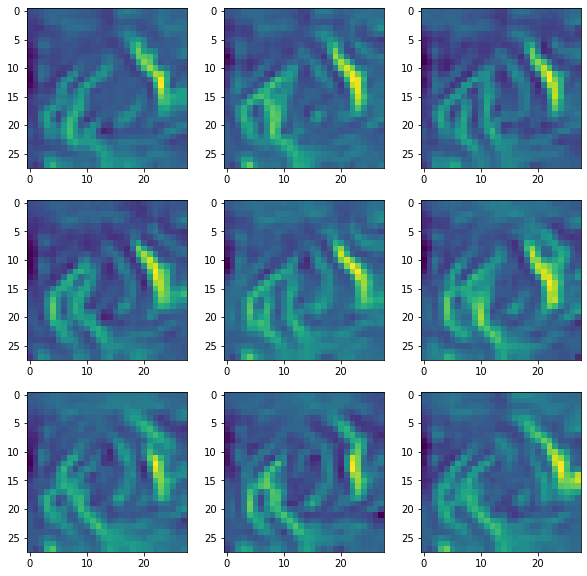

In [ ]:
filter_idx = 0
fig = plt.figure(figsize=(10,10))
for i, lpnorm in enumerate([0, 2, 4, 6, 8, 10, 12, 14, 16]):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                               tv_weight=8, lp_norm_weight=lpnorm)
    #plt.figure()
    fig.add_subplot(3,3,i+1)
    plt.imshow(img[..., 0])

L-p norm = 10 seems to be a good value (default=10)

## 7.4.4 Visualizing input that maximizes the output of class 0
(Tunned parameters: total variation = 8, L-p norm = 10)

Iteration: 1, named_losses: [('ActivationMax Loss', -0.009474453),
 ('L-6.0 Norm Loss', 0.019827215),
 ('TV(2.0) Loss', 0.072719716)], overall loss: 0.0830724760890007
Iteration: 2, named_losses: [('ActivationMax Loss', 69.395546),
 ('L-6.0 Norm Loss', 0.16917577),
 ('TV(2.0) Loss', 404.9101)], overall loss: 474.4748229980469
Iteration: 3, named_losses: [('ActivationMax Loss', -127.113914),
 ('L-6.0 Norm Loss', 0.2202492),
 ('TV(2.0) Loss', 266.17004)], overall loss: 139.27638244628906
Iteration: 4, named_losses: [('ActivationMax Loss', -339.49835),
 ('L-6.0 Norm Loss', 0.22044517),
 ('TV(2.0) Loss', 218.71342)], overall loss: -120.56446838378906
Iteration: 5, named_losses: [('ActivationMax Loss', -524.5647),
 ('L-6.0 Norm Loss', 0.24100398),
 ('TV(2.0) Loss', 235.12477)], overall loss: -289.19891357421875
Iteration: 6, named_losses: [('ActivationMax Loss', -669.2671),
 ('L-6.0 Norm Loss', 0.28415734),
 ('TV(2.0) Loss', 273.10907)], overall loss: -395.87384033203125
Iteration: 7, named

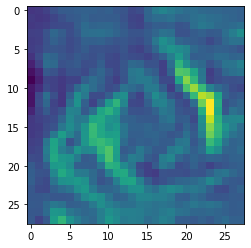

In [ ]:
filter_idx = 0
img = visualize_activation(model, layer_idx,
    filter_indices=filter_idx, input_range=(0., 1.), verbose=True,
    max_iter=1000, tv_weight=8., lp_norm_weight=10.)
#plot.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
plot.imshow(img.squeeze(), interpolation='nearest')

## 7.4.5 Visualizing input that maximizes the output of each class

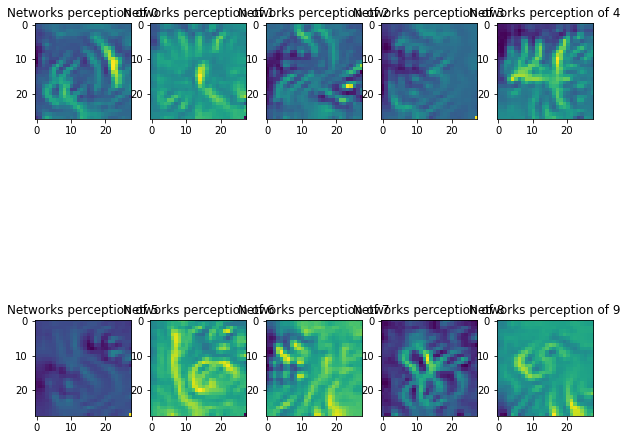

In [ ]:
fig = plt.figure(figsize=(10,10))
for class_idx in np.arange(10):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=class_idx, input_range=(0., 1.),
        max_iter=1000, tv_weight=8., lp_norm_weight=10.)
    #plt.figure()
    fig.add_subplot(2,5,class_idx+1)
    plt.title('Networks perception of {}'.format(class_idx))
    plt.imshow(img[..., 0])

# End of Notebook